In [56]:
import sys
sys.path.append('../')

# Datasets

We create a dataset by following the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets)

In [64]:
from pathlib import Path

DATAROOT = Path('../data/output/denoiser')
FRAGMENTS_DIR = Path('../data/input/train')
LOAD_SIZE = 1024
REGION_SIZE = 256
SV = '28'

DATAROOT.mkdir(parents=True, exist_ok=True)
print('Dataroot:', DATAROOT)

Dataroot: ../data/output/denoiser


In [66]:
from sp.data.img2label import Img2LabelDataset

Img2LabelDataset.preprocess(
    region_size=LOAD_SIZE,  # We make the regions big enough so that we can do a lot of random crops
    fragments_dir=FRAGMENTS_DIR,
    outdir=DATAROOT,
    sample_path=f'surface_volume/{SV}.tif',
    label_path='ir.png',
    mask_samples_only=True,
    splits=[
        ('train', ['1', '2']),
        ('val', ['3']),
        ('test', ['3'])
    ])

Split: train:   0%|          | 0/2 [00:00<?, ?it/s]

Fold: 1:   0%|          | 0/56 [00:00<?, ?it/s]

Fold: 2:   0%|          | 0/150 [00:00<?, ?it/s]

Split: val:   0%|          | 0/1 [00:00<?, ?it/s]

Fold: 3:   0%|          | 0/48 [00:00<?, ?it/s]

Split: test:   0%|          | 0/1 [00:00<?, ?it/s]

Fold: 3:   0%|          | 0/48 [00:00<?, ?it/s]

Done!


[fold_A] =  ../data/output/denoiser/A
[fold_B] =  ../data/output/denoiser/B
[fold_AB] =  ../data/output/denoiser
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = train, use 83/83 images
split = train, number of images = 83
split = val, use 11/11 images
split = val, number of images = 11
split = test, use 11/11 images
split = test, number of images = 11
A  B  __meta__	meta.json  test  train	val


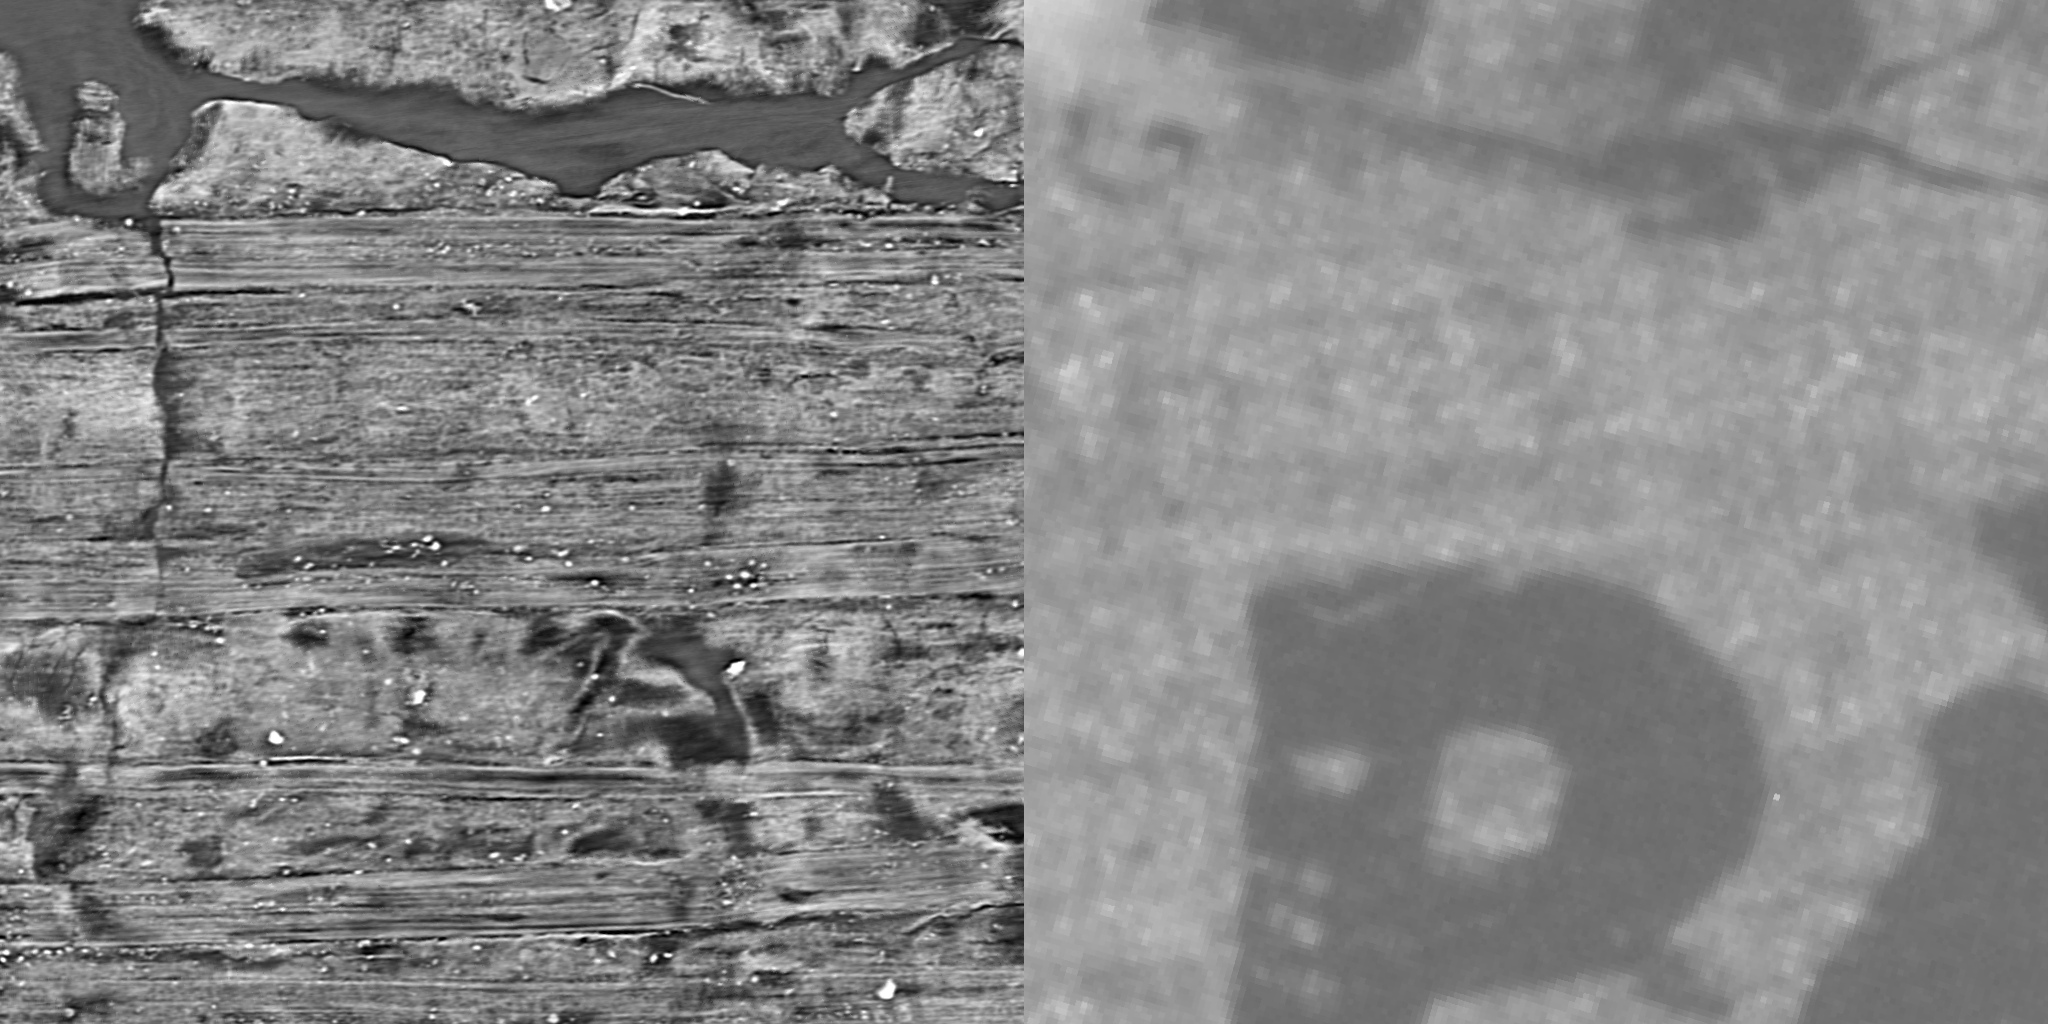

In [67]:
!python datasets/combine_A_and_B.py \
    --fold_A $DATAROOT/A \
    --fold_B $DATAROOT/B \
    --fold_AB $DATAROOT
!ls $DATAROOT

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

Image.open(DATAROOT / 'train/1.png')

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [68]:
MODEL_NAME = 'xray2ir'

In [71]:
!mkdir -p ./checkpoints/$MODEL_NAME
!ls ./checkpoints/$MODEL_NAME

10_net_D.pth  20_net_G.pth  35_net_D.pth  5_net_G.pth	    train_opt.txt
10_net_G.pth  25_net_D.pth  35_net_G.pth  latest_net_D.pth  web
15_net_D.pth  25_net_G.pth  40_net_D.pth  latest_net_G.pth
15_net_G.pth  30_net_D.pth  40_net_G.pth  loss_log.txt
20_net_D.pth  30_net_G.pth  5_net_D.pth   test_opt.txt


# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

**NOTE: Attach --continue_train if it gets stuck**

In [77]:
!python train.py --dataroot $DATAROOT --name $MODEL_NAME --model pix2pix --gpu_ids 0 --save_epoch_freq 50 --n_epochs 1000 --load_size $LOAD_SIZE --crop_size $REGION_SIZE --preprocess crop

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ../data/output/denoiser       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              



Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/xray2ir/web...
/home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
learning rate 0.0002000 -> 0.0002000
End of epoch 1 / 1100 	 Time Taken: 6 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 2, iters: 17, time: 0.062, data: 0.093) G_GAN

End of epoch 45 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 46, iters: 65, time: 0.063, data: 0.001) G_GAN: 2.776 G_L1: 12.648 D_real: 0.209 D_fake: 0.060 
End of epoch 46 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 47, iters: 82, time: 0.066, data: 0.001) G_GAN: 3.101 G_L1: 22.617 D_real: 0.045 D_fake: 0.126 
End of epoch 47 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 48 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 49, iters: 16, time: 0.220, data: 0.001) G_GAN: 1.536 G_L1: 19.741 D_real: 0.015 D_fake: 0.415 
End of epoch 49 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 50, iters: 33, time: 0.064, data: 0.001) G_GAN: 1.969 G_L1: 14.845 D_real: 1.892 D_fake: 0.852 
saving the model at the end of epoch 50, iters 4150
End of epoch 50 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 51, iters: 50, time: 0.062, data: 0.001) G_G

End of epoch 94 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 95 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 96, iters: 15, time: 0.064, data: 0.001) G_GAN: 2.923 G_L1: 20.249 D_real: 0.011 D_fake: 0.095 
End of epoch 96 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 97, iters: 32, time: 0.271, data: 0.001) G_GAN: 1.780 G_L1: 13.513 D_real: 0.016 D_fake: 0.223 
End of epoch 97 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 98, iters: 49, time: 0.064, data: 0.001) G_GAN: 3.081 G_L1: 14.954 D_real: 0.196 D_fake: 0.049 
End of epoch 98 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 99, iters: 66, time: 0.063, data: 0.001) G_GAN: 1.914 G_L1: 9.838 D_real: 1.751 D_fake: 0.138 
End of epoch 99 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 100, iters: 83, time: 0.064, data: 0.001) G_GAN: 1.552 G_L1: 29.630 D_real: 0.007 D_fake: 0.353 


End of epoch 143 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 144, iters: 31, time: 0.066, data: 0.001) G_GAN: 2.346 G_L1: 30.227 D_real: 0.000 D_fake: 0.264 
End of epoch 144 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 145, iters: 48, time: 0.405, data: 0.001) G_GAN: 2.476 G_L1: 12.518 D_real: 0.244 D_fake: 0.070 
End of epoch 145 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 146, iters: 65, time: 0.064, data: 0.001) G_GAN: 1.649 G_L1: 16.660 D_real: 0.009 D_fake: 0.358 
End of epoch 146 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 147, iters: 82, time: 0.064, data: 0.001) G_GAN: 2.858 G_L1: 21.289 D_real: 0.002 D_fake: 0.074 
End of epoch 147 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 148 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 149, iters: 16, time: 0.062, data: 0.001) G_GAN: 2.302 G_L1: 22.537 D_real: 0.001 D_fa

(epoch: 192, iters: 47, time: 0.063, data: 0.001) G_GAN: 1.269 G_L1: 9.430 D_real: 2.187 D_fake: 0.246 
End of epoch 192 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 193, iters: 64, time: 0.381, data: 0.001) G_GAN: 2.215 G_L1: 13.758 D_real: 0.263 D_fake: 0.117 
End of epoch 193 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 194, iters: 81, time: 0.066, data: 0.001) G_GAN: 1.860 G_L1: 17.431 D_real: 0.000 D_fake: 0.187 
End of epoch 194 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 195 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 196, iters: 15, time: 0.065, data: 0.001) G_GAN: 1.373 G_L1: 15.529 D_real: 0.171 D_fake: 0.272 
End of epoch 196 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 197, iters: 32, time: 0.066, data: 0.001) G_GAN: 1.456 G_L1: 10.809 D_real: 2.576 D_fake: 0.257 
End of epoch 197 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 

End of epoch 240 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 241, iters: 80, time: 0.411, data: 0.001) G_GAN: 1.880 G_L1: 17.790 D_real: 0.000 D_fake: 0.168 
saving the latest model (epoch 241, total_iters 20000)
End of epoch 241 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 242 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 243, iters: 14, time: 0.063, data: 0.001) G_GAN: 1.619 G_L1: 7.789 D_real: 1.201 D_fake: 0.171 
End of epoch 243 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 244, iters: 31, time: 0.064, data: 0.001) G_GAN: 2.388 G_L1: 28.432 D_real: 0.000 D_fake: 0.105 
End of epoch 244 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 245, iters: 48, time: 0.063, data: 0.001) G_GAN: 1.614 G_L1: 16.148 D_real: 0.000 D_fake: 0.306 
End of epoch 245 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 246, iters: 65, time: 0.504, dat

End of epoch 289 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 290, iters: 13, time: 0.485, data: 0.001) G_GAN: 1.041 G_L1: 7.815 D_real: 0.729 D_fake: 0.394 
End of epoch 290 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 291, iters: 30, time: 0.064, data: 0.001) G_GAN: 1.633 G_L1: 12.738 D_real: 1.583 D_fake: 0.181 
End of epoch 291 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 292, iters: 47, time: 0.064, data: 0.001) G_GAN: 1.387 G_L1: 21.068 D_real: 0.000 D_fake: 0.459 
End of epoch 292 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 293, iters: 64, time: 0.064, data: 0.001) G_GAN: 3.032 G_L1: 16.518 D_real: 0.083 D_fake: 0.055 
End of epoch 293 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 294, iters: 81, time: 0.585, data: 0.001) G_GAN: 2.279 G_L1: 13.317 D_real: 0.021 D_fake: 0.125 
End of epoch 294 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 

(epoch: 338, iters: 29, time: 0.603, data: 0.001) G_GAN: 1.691 G_L1: 21.087 D_real: 0.000 D_fake: 0.356 
End of epoch 338 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 339, iters: 46, time: 0.063, data: 0.001) G_GAN: 1.301 G_L1: 10.681 D_real: 2.123 D_fake: 0.448 
End of epoch 339 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 340, iters: 63, time: 0.064, data: 0.001) G_GAN: 1.728 G_L1: 24.882 D_real: 0.010 D_fake: 0.248 
End of epoch 340 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 341, iters: 80, time: 0.064, data: 0.001) G_GAN: 3.398 G_L1: 21.452 D_real: 0.906 D_fake: 0.029 
End of epoch 341 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 342 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 343, iters: 14, time: 0.515, data: 0.001) G_GAN: 1.940 G_L1: 11.830 D_real: 1.910 D_fake: 0.141 
End of epoch 343 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 ->

End of epoch 386 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 387, iters: 62, time: 0.062, data: 0.001) G_GAN: 1.631 G_L1: 35.128 D_real: 0.000 D_fake: 0.256 
End of epoch 387 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 388, iters: 79, time: 0.064, data: 0.001) G_GAN: 2.309 G_L1: 25.662 D_real: 0.000 D_fake: 0.131 
End of epoch 388 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 389 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 390, iters: 13, time: 0.063, data: 0.001) G_GAN: 1.603 G_L1: 16.791 D_real: 0.000 D_fake: 0.701 
End of epoch 390 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 391, iters: 30, time: 0.686, data: 0.001) G_GAN: 2.972 G_L1: 11.336 D_real: 3.239 D_fake: 0.053 
End of epoch 391 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 392, iters: 47, time: 0.064, data: 0.001) G_GAN: 1.855 G_L1: 19.691 D_real: 0.003 D_fa

(epoch: 435, iters: 78, time: 0.064, data: 0.001) G_GAN: 1.712 G_L1: 12.131 D_real: 0.258 D_fake: 0.225 
End of epoch 435 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 436 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 437, iters: 12, time: 0.062, data: 0.001) G_GAN: 3.745 G_L1: 23.811 D_real: 0.004 D_fake: 0.032 
End of epoch 437 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 438, iters: 29, time: 0.063, data: 0.001) G_GAN: 2.484 G_L1: 20.609 D_real: 0.005 D_fake: 0.097 
End of epoch 438 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 439, iters: 46, time: 0.700, data: 0.001) G_GAN: 1.901 G_L1: 18.634 D_real: 0.012 D_fake: 0.582 
End of epoch 439 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 440, iters: 63, time: 0.066, data: 0.001) G_GAN: 3.331 G_L1: 15.052 D_real: 0.007 D_fake: 0.057 
End of epoch 440 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 ->

(epoch: 484, iters: 11, time: 0.065, data: 0.001) G_GAN: 1.416 G_L1: 12.758 D_real: 0.015 D_fake: 0.468 
End of epoch 484 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 485, iters: 28, time: 0.065, data: 0.001) G_GAN: 2.755 G_L1: 24.748 D_real: 0.001 D_fake: 0.078 
End of epoch 485 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 486, iters: 45, time: 0.064, data: 0.001) G_GAN: 1.683 G_L1: 31.334 D_real: 0.000 D_fake: 0.220 
End of epoch 486 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 487, iters: 62, time: 0.788, data: 0.001) G_GAN: 0.831 G_L1: 15.831 D_real: 1.387 D_fake: 0.945 
End of epoch 487 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 488, iters: 79, time: 0.065, data: 0.001) G_GAN: 1.817 G_L1: 15.063 D_real: 0.006 D_fake: 0.250 
End of epoch 488 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 489 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 ->

End of epoch 532 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 533, iters: 44, time: 0.066, data: 0.001) G_GAN: 2.260 G_L1: 15.960 D_real: 0.147 D_fake: 0.099 
End of epoch 533 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 534, iters: 61, time: 0.064, data: 0.001) G_GAN: 0.914 G_L1: 24.766 D_real: 0.000 D_fake: 1.499 
End of epoch 534 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 535, iters: 78, time: 0.841, data: 0.000) G_GAN: 1.205 G_L1: 12.201 D_real: 0.917 D_fake: 0.401 
End of epoch 535 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 536 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 537, iters: 12, time: 0.065, data: 0.001) G_GAN: 1.859 G_L1: 15.428 D_real: 0.001 D_fake: 0.195 
End of epoch 537 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 538, iters: 29, time: 0.066, data: 0.001) G_GAN: 2.156 G_L1: 47.332 D_real: 0.000 D_fa

(epoch: 581, iters: 60, time: 0.064, data: 0.001) G_GAN: 2.375 G_L1: 12.071 D_real: 1.755 D_fake: 0.107 
End of epoch 581 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 582, iters: 77, time: 0.064, data: 0.001) G_GAN: 2.135 G_L1: 14.425 D_real: 0.001 D_fake: 0.149 
End of epoch 582 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 583 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 584, iters: 11, time: 0.897, data: 0.001) G_GAN: 1.855 G_L1: 59.468 D_real: 0.000 D_fake: 0.185 
End of epoch 584 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 585, iters: 28, time: 0.064, data: 0.001) G_GAN: 1.309 G_L1: 34.839 D_real: 0.007 D_fake: 0.595 
End of epoch 585 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 586, iters: 45, time: 0.065, data: 0.001) G_GAN: 2.299 G_L1: 12.704 D_real: 1.224 D_fake: 0.124 
End of epoch 586 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 ->

End of epoch 629 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 630 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 631, iters: 10, time: 0.065, data: 0.001) G_GAN: 1.473 G_L1: 25.300 D_real: 0.000 D_fake: 0.405 
End of epoch 631 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 632, iters: 27, time: 0.878, data: 0.001) G_GAN: 2.130 G_L1: 13.997 D_real: 0.195 D_fake: 0.130 
End of epoch 632 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 633, iters: 44, time: 0.063, data: 0.001) G_GAN: 1.178 G_L1: 10.582 D_real: 1.333 D_fake: 0.349 
End of epoch 633 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 634, iters: 61, time: 0.065, data: 0.001) G_GAN: 1.130 G_L1: 17.904 D_real: 0.185 D_fake: 0.508 
End of epoch 634 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 635, iters: 78, time: 0.064, data: 0.001) G_GAN: 1.252 G_L1: 31.038 D_real: 0.000 D_fa

End of epoch 678 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 679, iters: 26, time: 0.063, data: 0.000) G_GAN: 2.326 G_L1: 30.215 D_real: 0.000 D_fake: 0.108 
End of epoch 679 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 680, iters: 43, time: 0.989, data: 0.001) G_GAN: 1.792 G_L1: 16.788 D_real: 1.087 D_fake: 0.219 
End of epoch 680 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 681, iters: 60, time: 0.064, data: 0.001) G_GAN: 2.278 G_L1: 10.684 D_real: 2.773 D_fake: 0.087 
End of epoch 681 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 682, iters: 77, time: 0.064, data: 0.001) G_GAN: 1.955 G_L1: 17.511 D_real: 0.000 D_fake: 0.200 
End of epoch 682 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 683 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 684, iters: 11, time: 0.063, data: 0.001) G_GAN: 2.291 G_L1: 25.276 D_real: 0.002 D_fa

(epoch: 727, iters: 42, time: 0.064, data: 0.001) G_GAN: 2.285 G_L1: 21.528 D_real: 0.202 D_fake: 0.120 
End of epoch 727 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 728, iters: 59, time: 0.992, data: 0.001) G_GAN: 2.484 G_L1: 15.454 D_real: 0.161 D_fake: 0.098 
End of epoch 728 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 729, iters: 76, time: 0.065, data: 0.001) G_GAN: 0.886 G_L1: 11.230 D_real: 0.001 D_fake: 3.871 
End of epoch 729 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 730 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 731, iters: 10, time: 0.066, data: 0.001) G_GAN: 2.882 G_L1: 17.101 D_real: 0.000 D_fake: 0.070 
End of epoch 731 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 732, iters: 27, time: 0.063, data: 0.001) G_GAN: 1.958 G_L1: 13.544 D_real: 1.913 D_fake: 0.175 
End of epoch 732 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 ->

End of epoch 775 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 776, iters: 75, time: 1.085, data: 0.001) G_GAN: 1.978 G_L1: 15.627 D_real: 0.002 D_fake: 0.176 
End of epoch 776 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 777 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 778, iters: 9, time: 0.064, data: 0.001) G_GAN: 2.096 G_L1: 15.807 D_real: 0.015 D_fake: 0.188 
End of epoch 778 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 779, iters: 26, time: 0.063, data: 0.001) G_GAN: 1.440 G_L1: 16.822 D_real: 0.007 D_fake: 0.369 
End of epoch 779 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 780, iters: 43, time: 0.064, data: 0.001) G_GAN: 3.346 G_L1: 35.645 D_real: 0.000 D_fake: 0.042 
End of epoch 780 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 781, iters: 60, time: 1.006, data: 0.001) G_GAN: 2.517 G_L1: 19.182 D_real: 0.004 D_fak

End of epoch 824 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 825, iters: 8, time: 1.152, data: 0.001) G_GAN: 2.403 G_L1: 29.025 D_real: 0.017 D_fake: 0.145 
End of epoch 825 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 826, iters: 25, time: 0.064, data: 0.002) G_GAN: 2.026 G_L1: 14.799 D_real: 0.045 D_fake: 0.287 
End of epoch 826 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 827, iters: 42, time: 0.064, data: 0.001) G_GAN: 2.026 G_L1: 14.244 D_real: 0.807 D_fake: 0.121 
End of epoch 827 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 828, iters: 59, time: 0.063, data: 0.001) G_GAN: 1.453 G_L1: 13.106 D_real: 2.721 D_fake: 0.253 
End of epoch 828 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 829, iters: 76, time: 1.161, data: 0.001) G_GAN: 1.526 G_L1: 25.364 D_real: 0.000 D_fake: 0.360 
End of epoch 829 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 

(epoch: 873, iters: 24, time: 1.118, data: 0.001) G_GAN: 1.924 G_L1: 25.833 D_real: 0.024 D_fake: 0.174 
End of epoch 873 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 874, iters: 41, time: 0.063, data: 0.001) G_GAN: 2.528 G_L1: 32.510 D_real: 0.000 D_fake: 0.131 
End of epoch 874 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 875, iters: 58, time: 0.064, data: 0.001) G_GAN: 1.614 G_L1: 27.999 D_real: 0.000 D_fake: 0.297 
End of epoch 875 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 876, iters: 75, time: 0.065, data: 0.001) G_GAN: 1.978 G_L1: 11.540 D_real: 0.889 D_fake: 0.126 
End of epoch 876 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
End of epoch 877 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 878, iters: 9, time: 1.144, data: 0.001) G_GAN: 1.732 G_L1: 13.971 D_real: 0.106 D_fake: 0.204 
End of epoch 878 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 

End of epoch 921 / 1100 	 Time Taken: 4 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 922, iters: 57, time: 0.065, data: 0.001) G_GAN: 1.119 G_L1: 8.699 D_real: 0.252 D_fake: 0.612 
End of epoch 922 / 1100 	 Time Taken: 3 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 923, iters: 74, time: 0.064, data: 0.001) G_GAN: 2.481 G_L1: 20.858 D_real: 0.001 D_fake: 0.094 
^C
Traceback (most recent call last):
  File "/home/tony/src/vesuvius-challenge-ink-detection/sp2p/train.py", line 64, in <module>
    visualizer.plot_current_losses(epoch, float(epoch_iter) / dataset_size, losses)
  File "/home/tony/src/vesuvius-challenge-ink-detection/sp2p/util/visualizer.py", line 226, in plot_current_losses
    self.vis.line(
  File "/home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/lib/python3.10/site-packages/visdom/__init__.py", line 414, in wrapped_f
    return f(*args, **kwargs)
  File "/home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/lib/python3.10/site-packages/visdom/__init__.

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [78]:
!ls checkpoints/$MODEL_NAME

100_net_D.pth  250_net_D.pth  400_net_D.pth  5_net_D.pth    850_net_D.pth
100_net_G.pth  250_net_G.pth  400_net_G.pth  5_net_G.pth    850_net_G.pth
10_net_D.pth   25_net_D.pth   40_net_D.pth   600_net_D.pth  900_net_D.pth
10_net_G.pth   25_net_G.pth   40_net_G.pth   600_net_G.pth  900_net_G.pth
150_net_D.pth  300_net_D.pth  450_net_D.pth  650_net_D.pth  latest_net_D.pth
150_net_G.pth  300_net_G.pth  450_net_G.pth  650_net_G.pth  latest_net_G.pth
15_net_D.pth   30_net_D.pth   500_net_D.pth  700_net_D.pth  loss_log.txt
15_net_G.pth   30_net_G.pth   500_net_G.pth  700_net_G.pth  test_opt.txt
200_net_D.pth  350_net_D.pth  50_net_D.pth   750_net_D.pth  train_opt.txt
200_net_G.pth  350_net_G.pth  50_net_G.pth   750_net_G.pth  web
20_net_D.pth   35_net_D.pth   550_net_D.pth  800_net_D.pth
20_net_G.pth   35_net_G.pth   550_net_G.pth  800_net_G.pth


## Evaluation + Export

In [79]:
!python test.py --dataroot $DATAROOT --model pix2pix --name $MODEL_NAME

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ../data/output/denoiser       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

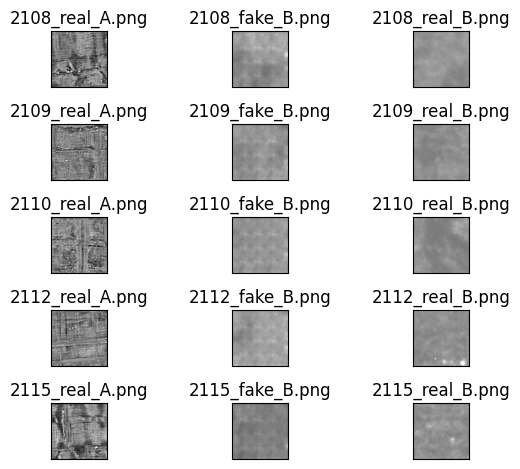

In [80]:
import matplotlib.pyplot as plt

SAMPLES = [2108, 2109, 2110, 2112, 2115]

fig, axs = plt.subplots(len(SAMPLES), 3)

for j, s in enumerate(SAMPLES):    
    for i, fname in enumerate([f'{s}_real_A.png', f'{s}_fake_B.png', f'{s}_real_B.png']):
        img = plt.imread(f'./results/{MODEL_NAME}/test_latest/images/{fname}')
        ax = axs[j][i]
        ax.imshow(img)
        ax.set(yticks=[], yticklabels=[], xticks=[], xticklabels=[], title=fname)

fig.tight_layout()
plt.show()

# Export Test

In [81]:
from sp.data.img2label import Img2LabelDataset
from sp.data import ImagePrinter

EVAL_ROOT = Path('../data/output/denoiser_eval')
Img2LabelDataset.preprocess(
    REGION_SIZE,
    FRAGMENTS_DIR,
    outdir=EVAL_ROOT,
    sample_path=f'surface_volume/{SV}.tif',
    label_path='ir.png',
    mask_samples_only=False,
    splits=[
        ('test', ['3'])
    ])

Split: test:   0%|          | 0/1 [00:00<?, ?it/s]

Fold: 3:   0%|          | 0/630 [00:00<?, ?it/s]

Done!


## Fragment 3

  0%|          | 0/630 [00:00<?, ?it/s]

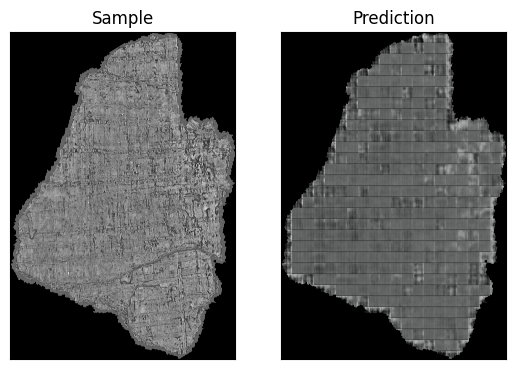

In [82]:
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
from sp.data import ImagePrinter, padding
from sp.data.img2label import Img2LabelDataset
from sp.inference import InkDetector
from IPython.display import Markdown
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from PIL import Image
from pathlib import Path

DENOISER_MODEL = Path('../build/denoiser_1685655683/denoiser_model.onnx')

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    _, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, (title, img) in enumerate(imgs):
        axs[0, i].imshow(np.asarray(img), cmap='gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[], title=title)
pred_image_paths = {}

ds = Img2LabelDataset(EVAL_ROOT, split='test')
PREDICTIONS_BASE_DIR = EVAL_ROOT
model = InkDetector(denoiser=DENOISER_MODEL)

for fragment_id, fragment_dir in [('3', FRAGMENTS_DIR / '3')]:
    display(Markdown(f'## Fragment {fragment_id}'))
    sample_img = Image.open(fragment_dir / f'surface_volume/{SV}.tif')
    
    pred_out_dir = PREDICTIONS_BASE_DIR
    pred_out_dir.mkdir(parents=True, exist_ok=True)
    pred_img = pred_out_dir / 'pred.png'
    pred_image_paths[fragment_id] = pred_img
    # NOTE: A bit hacky using the mask to compute size.
    with Image.open(fragment_dir / 'mask.png') as mask:
        size = mask.size
    with ImagePrinter(pred_img, size=size, channels=3) as pred_writer:
        for samples, _, regions, masks in tqdm(DataLoader(ds, batch_size=1, shuffle=False)):
            for sample, region, mask in zip(torch.unbind(samples), torch.unbind(regions), torch.unbind(masks)):
                with torch.no_grad():
                    pred = model(sample)
                region = tuple(region.numpy())
                pred = padding.unpad(
                    pred.squeeze(),
                    region,
                    REGION_SIZE)
                pred = (pred * mask.numpy() * 255).astype(np.uint8)
                pred_writer.write(region, pred)

    pred_final = Image.open(pred_img)
    grid = [
        ('Sample', sample_img),
        ('Prediction', pred_final),
    ]
    show(grid)